<a href="https://colab.research.google.com/github/isabmoreeno/Cinema_Acessibilidade_Brasil/blob/main/02_analise_exploratoria_cinema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória — Acessibilidade Econômica ao Cinema no Brasil

Este notebook apresenta a análise exploratória dos dados de renda per capita dos municípios e estados brasileiros, com o objetivo de investigar a acessibilidade econômica ao cinema.

A partir da renda média mensal, foi criado um indicador chamado **Índice de Acessibilidade Econômica ao Cinema (IAEC)**, que representa o percentual da renda mensal necessário para a compra de um ingresso de cinema.

* Preço médio do ingresso considerado: **R$ 35,00**.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_municipios = pd.read_excel(
    'Tabela Per Capita-Brasil.xlsx',
    sheet_name='Municípios'
)

df_estados = pd.read_excel(
    'Tabela Per Capita-Brasil.xlsx',
    sheet_name='Estados'
)

df_municipios.columns = ['municipio', 'uf', 'renda_per_capita']
df_estados.columns = ['estado', 'uf', 'renda_per_capita']

df_municipios.head(), df_estados.head()

(                municipio  uf  renda_per_capita
 0  Alta Floresta D'Oeste   RO           1210.60
 1              Ariquemes   RO           1458.57
 2                 Cabixi   RO           1323.79
 3                 Cacoal   RO           1625.88
 4             Cerejeiras   RO           1554.33,
      estado  uf  renda_per_capita
 0      Acre  AC           1067.93
 1   Alagoas  AL           1034.94
 2     Amapá  AP           1142.15
 3  Amazonas  AM            979.58
 4     Bahia  BA           1079.17)

In [4]:
df_municipios.info()
df_municipios.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         5570 non-null   object 
 1   uf                5570 non-null   object 
 2   renda_per_capita  5570 non-null   float64
dtypes: float64(1), object(2)
memory usage: 130.7+ KB


,renda_per_capita
count,5570.000000
mean,1211.587144
std,493.337884
min,288.650000
25%,772.390000
50%,1182.540000
75%,1520.357500
max,4299.910000


In [5]:
df_estados.info()
df_estados.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   estado            27 non-null     object 
 1   uf                27 non-null     object 
 2   renda_per_capita  27 non-null     float64
dtypes: float64(1), object(2)
memory usage: 780.0+ bytes


,renda_per_capita
count,27.000000
mean,1463.015556
std,503.083953
min,899.870000
25%,1073.550000
50%,1246.740000
75%,1767.695000
max,2999.180000


# Ranking de Renda Per Capita — Estados do Brasil

### Estados com Maior Renda Per Capita

In [6]:
df_estados.sort_values(by='renda_per_capita', ascending=False).head(10)

,estado,uf,renda_per_capita
6,Distrito Federal,DF,2999.18
23,Santa Catarina,SC,2220.40
24,São Paulo,SP,2093.44
20,Rio Grande do Sul,RS,2042.12
15,Paraná,PR,1965.12
18,Rio de Janeiro,RJ,1846.50
10,Mato Grosso,MT,1825.26
11,Mato Grosso do Sul,MS,1710.13
8,Goiás,GO,1697.17
7,Espírito Santo,ES,1650.72


### Estados com Menor Renda Per Capita


In [7]:
df_estados.sort_values(by='renda_per_capita').head(10)

,estado,uf,renda_per_capita
9,Maranhão,MA,899.87
3,Amazonas,AM,979.58
13,Pará,PA,994.00
17,Piauí,PI,1009.27
1,Alagoas,AL,1034.94
5,Ceará,CE,1055.98
0,Acre,AC,1067.93
4,Bahia,BA,1079.17
14,Paraíba,PB,1097.81
16,Pernambuco,PE,1141.02


**O acesso à renda é extremamente desigual no Brasil, o que indica que o acesso ao lazer cultural também é.**

# Ranking de Renda Per Capita — Municípios do Brasil

### Municípios com Maior Renda Per Capita

In [8]:
df_municipios.sort_values(by='renda_per_capita', ascending=False).head(10)

,municipio,uf,renda_per_capita
2763,Nova Lima,MG,4299.91
3812,São Caetano do Sul,SP,3884.58
4398,Florianópolis,SC,3636.13
4337,Balneário Camboriú,SC,3583.85
3222,Niterói,RJ,3577.32
3795,Santana de Parnaíba,SP,3465.07
4468,Marema,SC,3440.45
3174,Vitória,ES,3351.64
4504,Petrolândia,SC,3308.39
4588,Tunápolis,SC,3288.15


### Municípios com Menor Renda Per Capita

In [9]:
df_municipios.sort_values(by='renda_per_capita').head(10)

,municipio,uf,renda_per_capita
150,Uiramutã,RR,288.65
165,Bagre,PA,358.65
1570,Manari,PE,359.10
477,Belágua,MA,388.46
492,Cachoeira Grande,MA,389.45
126,São Paulo de Olivença,AM,396.95
604,Primeira Cruz,MA,413.00
535,Humberto de Campos,MA,415.69
560,Marajá do Sena,MA,425.87
132,Tonantins,AM,432.01


# Criação do Índice de Acessibilidade Econômica ao Cinema (IAEC)

In [10]:
preco_ingresso = 35

df_estados['iaec_percentual'] = (preco_ingresso / df_estados['renda_per_capita']) * 100
df_municipios['iaec_percentual'] = (preco_ingresso / df_municipios['renda_per_capita']) * 100

df_estados.head(), df_municipios.head()

(     estado  uf  renda_per_capita  iaec_percentual
 0      Acre  AC           1067.93         3.277368
 1   Alagoas  AL           1034.94         3.381839
 2     Amapá  AP           1142.15         3.064396
 3  Amazonas  AM            979.58         3.572960
 4     Bahia  BA           1079.17         3.243233,
                 municipio  uf  renda_per_capita  iaec_percentual
 0  Alta Floresta D'Oeste   RO           1210.60         2.891128
 1              Ariquemes   RO           1458.57         2.399611
 2                 Cabixi   RO           1323.79         2.643924
 3                 Cacoal   RO           1625.88         2.152680
 4             Cerejeiras   RO           1554.33         2.251774)

## Ranking dos Estados por Acessibilidade Econômica ao Cinema

Estados com Menor Acessibilidade ao Cinema

In [11]:
df_estados.sort_values(by='iaec_percentual', ascending=False).head(10)

,estado,uf,renda_per_capita,iaec_percentual
9,Maranhão,MA,899.87,3.889451
3,Amazonas,AM,979.58,3.572960
13,Pará,PA,994.00,3.521127
17,Piauí,PI,1009.27,3.467853
1,Alagoas,AL,1034.94,3.381839
5,Ceará,CE,1055.98,3.314457
0,Acre,AC,1067.93,3.277368
4,Bahia,BA,1079.17,3.243233
14,Paraíba,PB,1097.81,3.188166
16,Pernambuco,PE,1141.02,3.067431


Estados com Maior Acessibilidade ao Cinema

In [12]:
df_estados.sort_values(by='iaec_percentual').head(10)

,estado,uf,renda_per_capita,iaec_percentual
6,Distrito Federal,DF,2999.18,1.166986
23,Santa Catarina,SC,2220.40,1.576293
24,São Paulo,SP,2093.44,1.671889
20,Rio Grande do Sul,RS,2042.12,1.713905
15,Paraná,PR,1965.12,1.781062
18,Rio de Janeiro,RJ,1846.50,1.895478
10,Mato Grosso,MT,1825.26,1.917535
11,Mato Grosso do Sul,MS,1710.13,2.046628
8,Goiás,GO,1697.17,2.062257
7,Espírito Santo,ES,1650.72,2.120287


## Ranking dos Municípios por Acessibilidade ao Cinema

Municípios com Menor Acessibilidade

In [13]:
df_municipios.sort_values(by='iaec_percentual', ascending=False).head(10)

,municipio,uf,renda_per_capita,iaec_percentual
150,Uiramutã,RR,288.65,12.125411
165,Bagre,PA,358.65,9.758818
1570,Manari,PE,359.10,9.746589
477,Belágua,MA,388.46,9.009937
492,Cachoeira Grande,MA,389.45,8.987033
126,São Paulo de Olivença,AM,396.95,8.817231
604,Primeira Cruz,MA,413.00,8.474576
535,Humberto de Campos,MA,415.69,8.419736
560,Marajá do Sena,MA,425.87,8.218470
132,Tonantins,AM,432.01,8.101664


Municípios com Maior Acessibilidade

In [14]:
df_municipios.sort_values(by='iaec_percentual').head(10)

,municipio,uf,renda_per_capita,iaec_percentual
2763,Nova Lima,MG,4299.91,0.813971
3812,São Caetano do Sul,SP,3884.58,0.900998
4398,Florianópolis,SC,3636.13,0.962562
4337,Balneário Camboriú,SC,3583.85,0.976603
3222,Niterói,RJ,3577.32,0.978386
3795,Santana de Parnaíba,SP,3465.07,1.010081
4468,Marema,SC,3440.45,1.017309
3174,Vitória,ES,3351.64,1.044265
4504,Petrolândia,SC,3308.39,1.057916
4588,Tunápolis,SC,3288.15,1.064428


# Gráfico — Estados onde o cinema é menos acessível

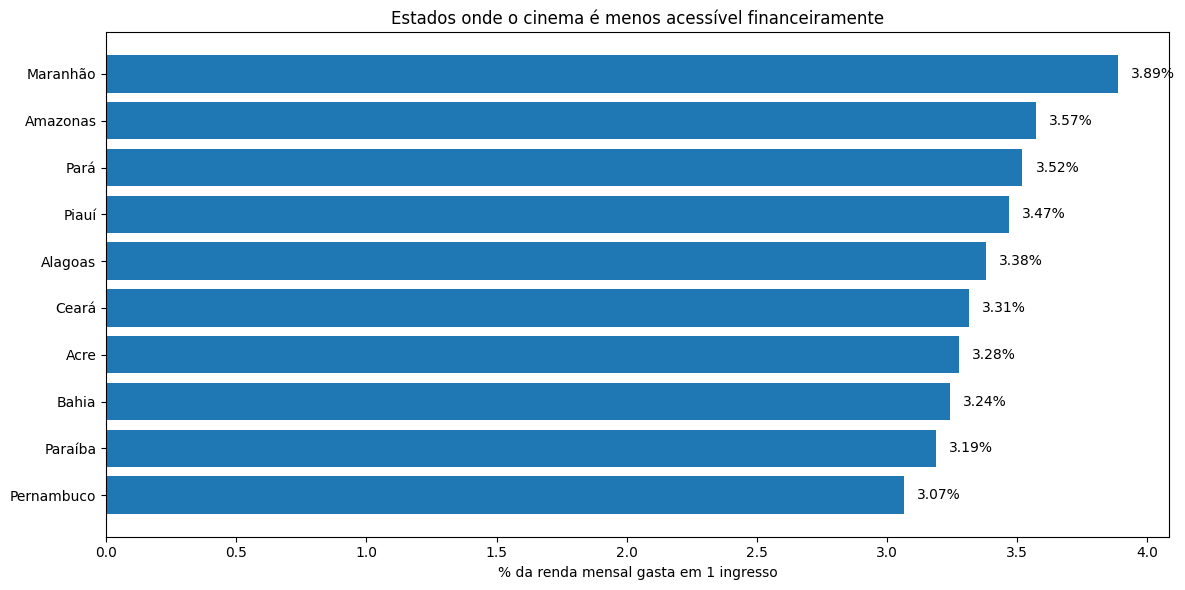

In [15]:
top10 = df_estados.sort_values(by='iaec_percentual', ascending=False).head(10)

plt.figure(figsize=(12,6))
bars = plt.barh(top10['estado'], top10['iaec_percentual'])

plt.xlabel('% da renda mensal gasta em 1 ingresso')
plt.title('Estados onde o cinema é menos acessível financeiramente')
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}%',
             va='center')

plt.tight_layout()
plt.show()

# Distribuição Nacional do IAEC (Municípios)

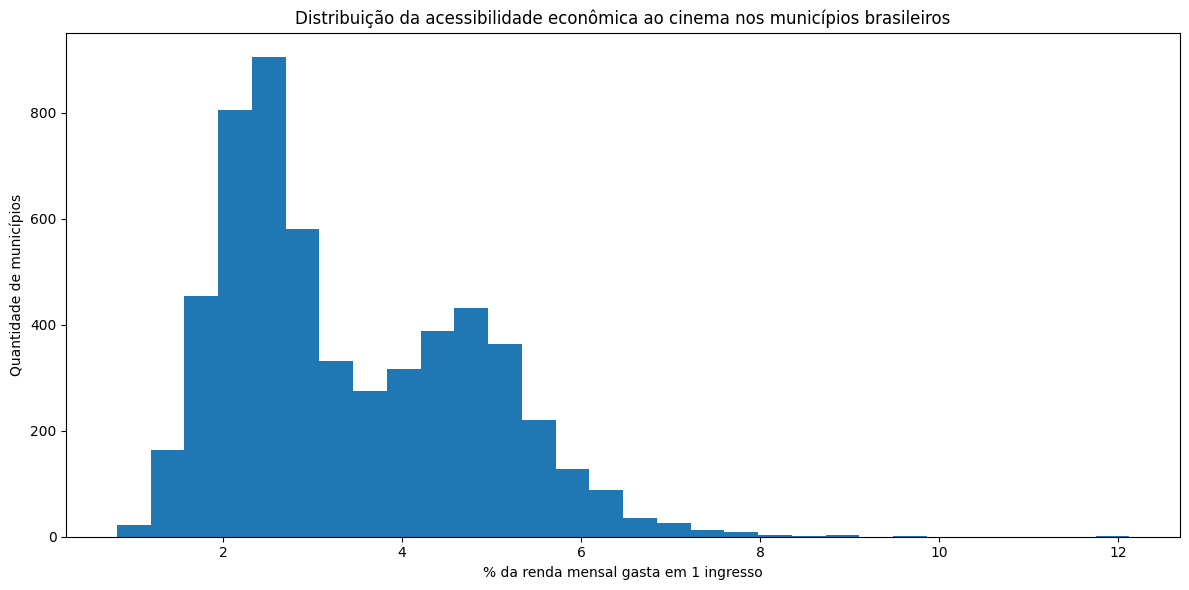

In [16]:
plt.figure(figsize=(12,6))

plt.hist(df_municipios['iaec_percentual'], bins=30)

plt.xlabel('% da renda mensal gasta em 1 ingresso')
plt.ylabel('Quantidade de municípios')
plt.title('Distribuição da acessibilidade econômica ao cinema nos municípios brasileiros')

plt.tight_layout()
plt.show()

# Classificação dos Municípios por Faixa de Acessibilidade

In [17]:
bins = [0, 1, 2, 3, 4, 100]
labels = [
    'Muito acessível',
    'Acessível',
    'Moderadamente caro',
    'Caro',
    'Muito caro'
]

df_municipios['faixa_acessibilidade'] = pd.cut(
    df_municipios['iaec_percentual'],
    bins=bins,
    labels=labels
)

df_municipios['faixa_acessibilidade'].value_counts()

,count
faixa_acessibilidade,
Moderadamente caro,2099
Muito caro,1886
Caro,844
Acessível,736
Muito acessível,5


# Gráfico — Classificação Nacional de Acessibilidade

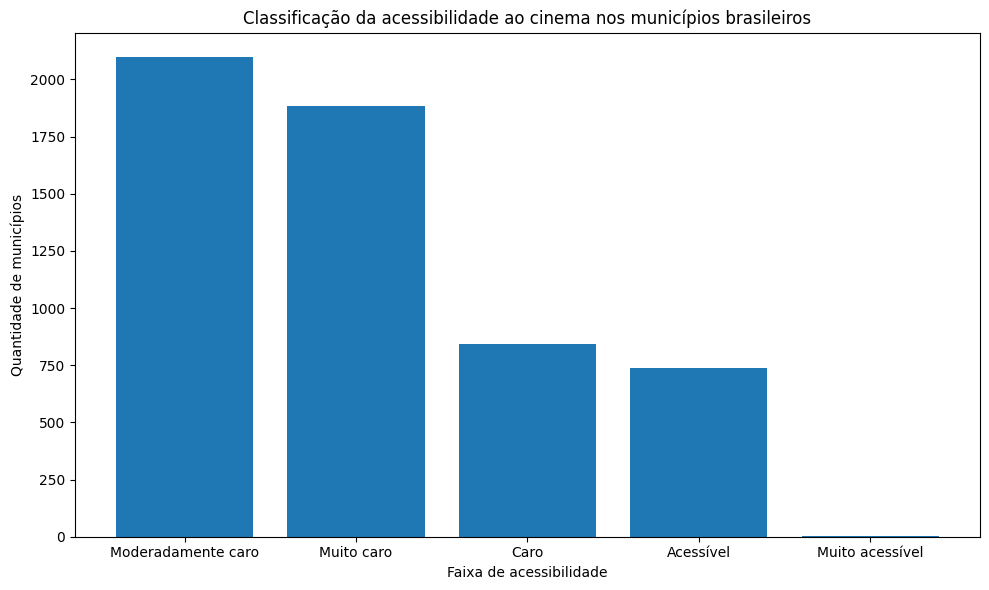

In [18]:
contagem = df_municipios['faixa_acessibilidade'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(contagem.index, contagem.values)

plt.xlabel('Faixa de acessibilidade')
plt.ylabel('Quantidade de municípios')
plt.title('Classificação da acessibilidade ao cinema nos municípios brasileiros')

plt.tight_layout()
plt.show()

## Principais Insights

- Existe uma grande desigualdade econômica no acesso ao cinema entre os municípios brasileiros.
- Em uma parcela significativa das cidades, mais de **3% da renda mensal per capita é comprometida com apenas um ingresso**.
- Estados com menor renda média apresentam os maiores índices de inacessibilidade.
- O acesso ao cinema no Brasil ainda é fortemente condicionado à renda, caracterizando uma forma de exclusão cultural econômica.